# Step 4: Tidying up


In [1]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

## Understanding matplotlib figure elements
In the previous steps we've seen how to structure plotting routines into functions, and how to compose a set of axes that can be filled in with these plots. But to get publication-quality figures, we now need to 'polish' the figure, i.e., visualise the results/data effectively and make the figure visually appealing. 

In this patr, we will focus on 'tidying up'. In other words, getting rid of unnecessary visual elements and adding some standard elements (like titles and panel numbers) in an automated way. In the next (and last) step, we will consider adding unique elements (such as extra bits of text or arrows). 

In this tutorial we will refer to some `matplotlib`-specific names of figure elements, such as _spines_, _ticks_ and _labels_. Their meanings are best explained by the following visual:

<img src="tutorial_content/fig_explainer_mpl_objects.jpeg" style="width:500px">

Source: https://twitter.com/mervenoyann/status/1549035813689667587?s=20

For this tutorial, we will introduce some functions that make life easy and tidy up some of these elements, in ways that are common to scientific publications. Further I will show how to use `matplotlib` native functions to alter a few of these elements, which should be fairly straightforward to apply to other elements using online documentation.

## Figure and font size
Firstly, make sure the figure is of the right size. When you create a figure, either by `fig = plt.figure()` or for example `fig, ax = plt.subplots()`, you should pass the desired size using the argument `figsize=(width_inches, height_inches)`. Tip: most journals specify the allowed figure size (particularly widths: page-width, half-page, ..). 

Next, set the font size. Firstly, you can change the default (font size) parameters of `matplotlib`. Secondly, you can always override default parameters for each text element individually. Use the following functions to update all font sizes (labels, titles, etc.) to the same size:

In [2]:
rfv.set_fontsize(font_size=10)  # this updated the default values for font size

Font size is set to 10


## Cleaning up:
Graphs are often clearer when unnecessary elements are removed. Let's start with the _spines_. In general, spines can be included/excluded by `ax.spines['top'].set_visible(True)` (or `False`). This package provides two shortcut functions that cover most applications: `rfv.despine()` and `rfv.naked()`. The figure below shows normal, despined and naked 'frames' for 3 different types of plots (line, scatter, heatmap). What frame do you like best per plot (there are no wrong answers!)?

Text(0.5, 1.0, 'Naked frame (0 spines)')

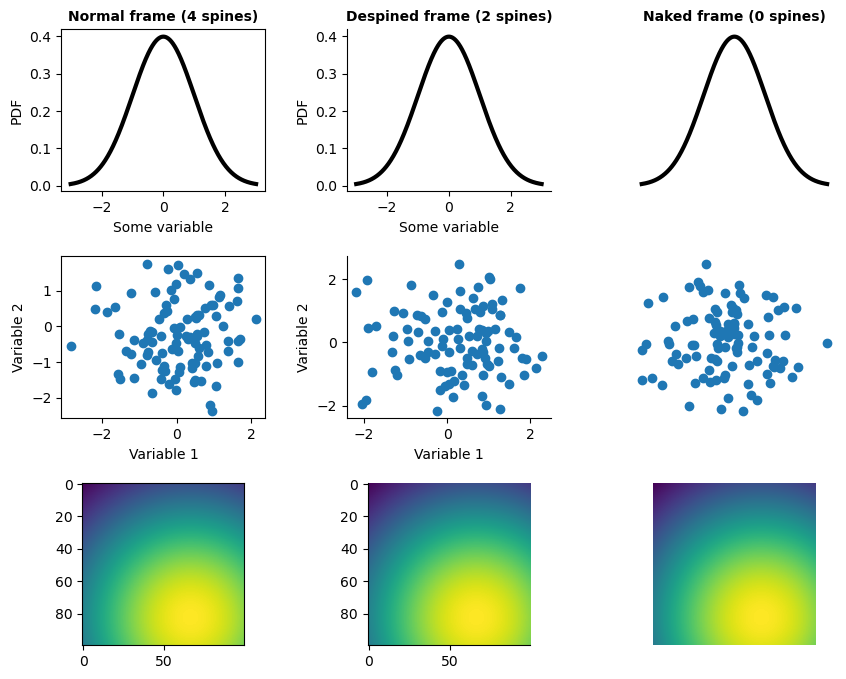

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8),  # figure is set to 10 inches wide by 8 inches high
                       gridspec_kw={'wspace': 0.4, 'hspace': 0.4})  # via the gridspec_kw argument, we are able to adjust individual gridspec parameters such as the spacing between subplots

for row in range(3):
    for col, curr_ax in enumerate(ax[row]):
        if row == 0:
            tut.plot_normal_distr(ax=curr_ax)
        elif row == 1:
            tut.plot_scatter_data_distr(ax=curr_ax)
            curr_ax.set_xlabel('Variable 1')
            curr_ax.set_ylabel('Variable 2')
        elif row == 2:
            tut.plot_gaussian_profile(ax=curr_ax, remove_spines=False, title='')

    rfv.despine(ax[row][1])  # remove right and top spine
    rfv.naked(ax[row][2])  # remove all 4 spines, ticks and labels

ax[0][0].set_title('Normal frame (4 spines)', weight='bold')
ax[0][1].set_title('Despined frame (2 spines)', weight='bold')
ax[0][2].set_title('Naked frame (0 spines)', weight='bold')

## Ticks & limits
Ticks are the indicators on axes and ticklabels their .. labels. By default, `matplotlib` will generate ticks at regular intervals it deems useful (span most of the data range, not too close to together etc.). We can override these by setting ticks manually using `ax.set_xticks()` and `ax.set_yticks()`, see the second plot below.

You can see that if the ticks don't fully span the data (as is the case for the x-axis), the full data extent is still shown. If ticks exceed the data span (as on the y-axis) this will rescale the axis. In other words; by default, all ticks and all data will be shown. However, if you'd like to limit the visible part of the plot, you can use `ax.set_xlim()` and `ax.set_ylim()`, see the third plot below:

(-1.1, 1.1)

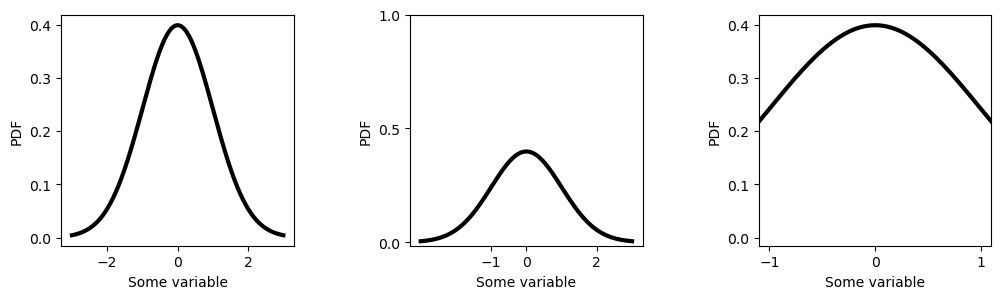

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.5})

for curr_ax in ax:
    tut.plot_normal_distr(ax=curr_ax)

## Overriding the ticks of the second axis:
ax[1].set_xticks([-1, 0, 2])
ax[1].set_yticks([0, 0.5, 1]);

## Overriding the ticks of the third axis:
ax[2].set_xticks([-1, 0, 1])

## Set limits of the third axis:
ax[2].set_xlim([-1.1, 1.1])

Not only can specify _where_ the ticks should be, also we can specify their labels by `ax.set_xticklabels()`. In the example below, we are using **Latex notation** to use special characters. To do so, in `matplotlib`, format the string as follows: `r"$ .. $"`. Here, `r` stands for 'raw' and the `$$` indicate a Latex equation. See the second axis. 

Another common use-case is when we don't want to change the ticks, but only the _tick labels_. For example, it's convenient that ticks are automatically best-placed dependent on the data, but we might want to change their appearance. In this case, we can call the current ticklabels, perform some operation on this list and override them. See the third example:

../scripts/rep_fig_vis.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticklabels()])
../scripts/rep_fig_vis.py:131: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' for x in ax.get_yticklabels()])
/home/tplas/anaconda3/envs/rf_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


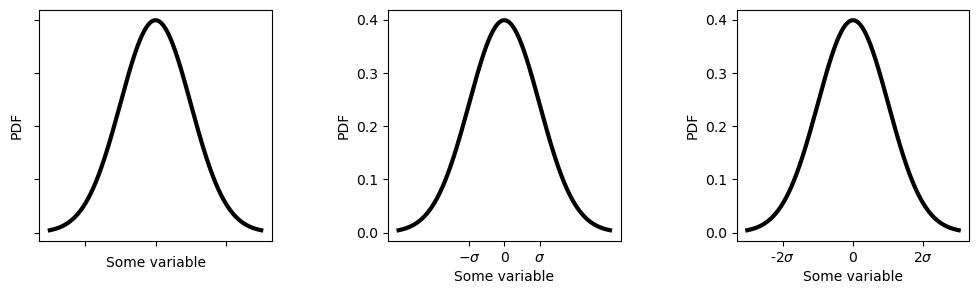

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.5})

for curr_ax in ax:
    tut.plot_normal_distr(ax=curr_ax, std_distr=1)

## Remove ticklabels but keep ticks:
rfv.remove_both_ticklabels(ax=ax[0])

## Overriding the ticks of the second axis:
ax[1].set_xticks([-1, 0, 1])
ax[1].set_xticklabels([r"$-\sigma$", '0', r"$\sigma$"])

## Override the ticklabels without changing the ticks:
current_xticks = rfv.get_list_ticks(ax=ax[2], axis='x')  # retrieve the current ticklabels
new_xticklabels = [f'{int(t)}' + r"$\sigma$" if t !=0 else 0 for t in current_xticks]  # create new ticklabels
ax[2].set_xticklabels(new_xticklabels);  # set the new ticklabels

There is a lot more you can do with ticks - as with most `matplotlib` functionalities you can tune them in any way you like! The main function to check out is `ax.tick_params()`, as well as the `matplotlib.ticker` module for adjusting the default placement of ticks. For more information, see for example: https://e2eml.school/matplotlib_ticks.html

We have written some extra functions to align limits across axes:

Text(0, 0.5, 'Same limits for x and y')

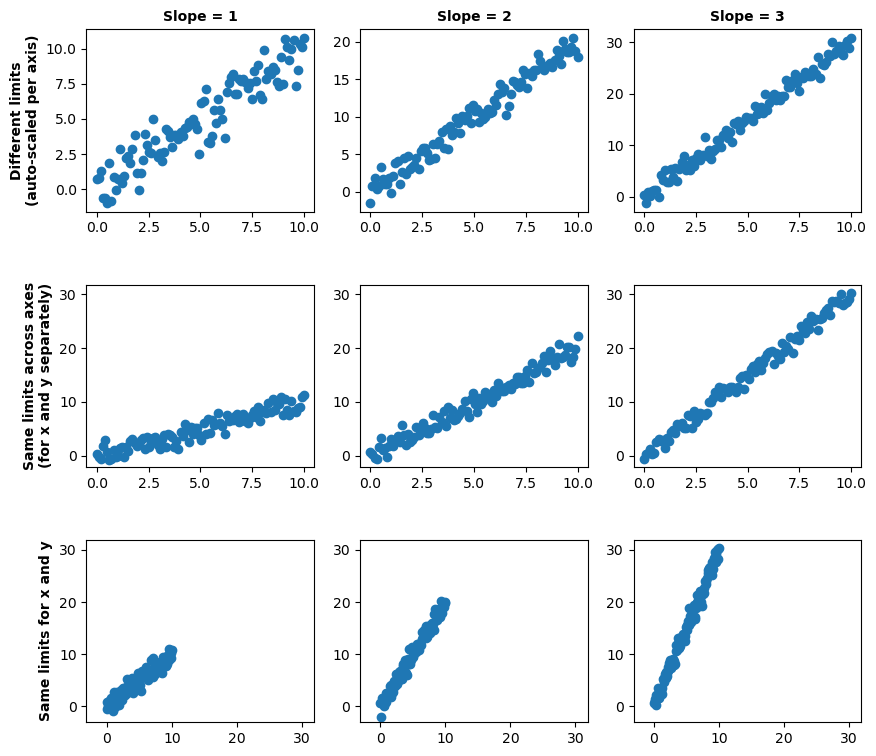

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(10, 9), gridspec_kw={'wspace': 0.2, 'hspace': 0.4})

for row in range(3):
    for col in range(3):
        tut.plot_scatter_along_line(ax=ax[row][col], slope=1 + col)
        if row == 0:
            ax[row][col].set_title(f'Slope = {1 + col}', weight='bold')

rfv.equal_lims_n_axs(ax_list=ax[1])  # set equal limits for all axes in the second row
rfv.equal_lims_n_axs(ax_list=ax[2])  # set equal limits for all axes in the third row
for i_ax, curr_ax in enumerate(ax[2]):
    rfv.equal_xy_lims(ax=curr_ax)  # set equal limits for x and y axes

ax[0][0].set_ylabel('Different limits\n(auto-scaled per axis)', weight='bold')
ax[1][0].set_ylabel('Same limits across axes\n(for x and y separately)', weight='bold')
ax[2][0].set_ylabel('Same limits for x and y', weight='bold')

## Customising text
The axis labels and the axis title can be set with `ax.set_xlabel()`, `ax.set_ylabel()` and `ax.set_title()`. The style of these and other text elements can be set using a _fontdict_. Any property that you do not specify will return to default. 
Fontdicts can also be passed to other text elements such as ticklabels or stand-alone text, as we will learn more about in the next step.

There are many options to customise text elements. These are some that you might often need (see plots below for examples):
- `weight`: boldness
- `x`, `y`: position
- `ha`, `va`: horizontal/vertical alignment

[And many more!](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) One final function of note is `fig.align_xlabels()`, which automatically aligns xlabels across axes (and same for ylabels). See the last example below:

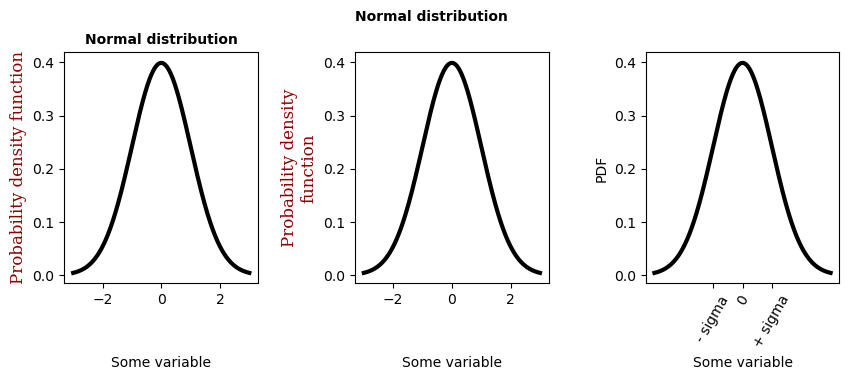

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'wspace': 0.5})

for curr_ax in ax:
    tut.plot_normal_distr(ax=curr_ax, std_distr=1)

fontdict = {'family': 'serif',  # font family}
            'color': 'darkred',  # font colour
            'weight': 'normal',  # font weight
            'size': 12,  # font size
           }   
ax[0].set_ylabel('Probability density function', fontdict=fontdict)


ax[0].set_title('Normal distribution', fontdict={'weight': 'bold'})  # only specifying weight, rest of the font properties will be inherited from the default font properties

## Even though fontdicts are the standard way of specifying font properties, you can also specify them individually as args:
ax[1].set_ylabel('Probability density\nfunction',  # newline character \n to split the text over 2 lines
                 fontfamily='serif', color='darkred', weight='normal', size=12)

## The position of text elements can be adjusted using the x and y arguments:
ax[1].set_title('Normal distribution', 
                x=0, y=1.1, # change position 
                ha='left', # change horizontal alignment (from default 'center'). It now aligns the left edge of the text with the left edge of the axes.
                fontdict={'weight': 'bold'})

ax[2].set_xticks([-1, 0, 1])
ax[2].set_xticklabels(['- sigma', '0', '+ sigma'], rotation=60)

## As a result of the rotation, the ticklabels now force the xlabel to be pushed down. 
## To re-align the xlabels across all subplots, we can use the following command:
fig.align_xlabels([ax[0], ax[1], ax[2]])  # give list of axes to align 

## Conclusions
Tidying up your figure can make the results is showing more clear, and the figure more visually appealing. Here we covered some of the most common operations: setting figure and font size, and customing spines, ticks and labels. 

### More information and resources:
- Tutorial on ticks and ticklabels: https://e2eml.school/matplotlib_ticks.html
- Documentation on `matplotlib` text elements: https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
